In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 13.3 MB/s eta 0:00:00


In [2]:
import os,getpass

def _Set_env(var:str):
  if not os.environ.get(var):
    os.environ[var]=getpass.getpass(f"{var}: ")

_Set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ··········


In [3]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 27.9 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Successfully uninstalled langsmith-0.3.44
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langchain-core-0.3.63:
      Successfully uninstalled langchain-core-0.3.63


In [4]:
from langchain_openai import ChatOpenAI
def multiply(a:int,b:int):
  '''
    Multiply a and b

    Args:
        a: first int
        b: second int

  '''
  return a*b


llm = ChatOpenAI(model="gpt-3.5-turbo")
llm_with_tool = llm.bind_tools([multiply])


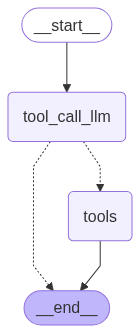

In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

#node
def tool_call_llm(state:MessagesState):
  return {'messages':[llm_with_tool.invoke(state['messages'])]}

builder = StateGraph(MessagesState)
builder.add_node('tool_call_llm',tool_call_llm)
builder.add_node('tools',ToolNode([multiply]))

builder.add_edge(START,'tool_call_llm')
builder.add_conditional_edges("tool_call_llm",tools_condition)
builder.add_edge('tools',END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content="what is 4 + 5")]
messages = graph.invoke({"messages":messages})
for m in messages['messages']:
  m.pretty_print()


================================ Human Message =================================

what is 4 + 5
================================== Ai Message ==================================
Tool Calls:
  multiply (call_AnSZKd9IkAmRyN7Cmt0GdgQc)
 Call ID: call_AnSZKd9IkAmRyN7Cmt0GdgQc
  Args:
    a: 4
    b: 5
================================= Tool Message =================================
Name: multiply

20


In [10]:
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content="hi")]
messages = graph.invoke({"messages":messages})
for m in messages['messages']:
  m.pretty_print()


================================ Human Message =================================

hi
================================== Ai Message ==================================

Hello! How can I assist you today?


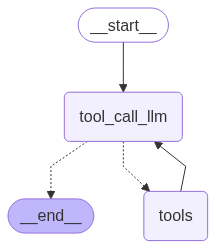

In [11]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

#node
def tool_call_llm(state:MessagesState):
  return {'messages':[llm_with_tool.invoke(state['messages'])]}

builder = StateGraph(MessagesState)
builder.add_node('tool_call_llm',tool_call_llm)
builder.add_node('tools',ToolNode([multiply]))

builder.add_edge(START,'tool_call_llm')
builder.add_conditional_edges("tool_call_llm",tools_condition)
builder.add_edge('tools','tool_call_llm')

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content="hi")]
messages = graph.invoke({"messages":messages})
for m in messages['messages']:
  m.pretty_print()


================================ Human Message =================================

hi
================================== Ai Message ==================================

Hello! How can I assist you today?


In [13]:
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content="result of 4 and 5")]
messages = graph.invoke({"messages":messages})
for m in messages['messages']:
  m.pretty_print()


================================ Human Message =================================

result of 4 and 5
================================== Ai Message ==================================
Tool Calls:
  multiply (call_HKAWeobiu1IF2s8tW6vvFwI2)
 Call ID: call_HKAWeobiu1IF2s8tW6vvFwI2
  Args:
    a: 4
    b: 5
  multiply (call_mnFL8y5uSF1z3JcfeXzVC6gp)
 Call ID: call_mnFL8y5uSF1z3JcfeXzVC6gp
  Args:
    a: 5
    b: 4
================================= Tool Message =================================
Name: multiply

20
================================= Tool Message =================================
Name: multiply

20
================================== Ai Message ==================================

The result of multiplying 4 and 5 is 20.


In [14]:
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content="multiplication of 4 and 5")]
messages = graph.invoke({"messages":messages})
for m in messages['messages']:
  m.pretty_print()


================================ Human Message =================================

multiplication of 4 and 5
================================== Ai Message ==================================
Tool Calls:
  multiply (call_LPLTVaxRxCbr1MswiIfygWn1)
 Call ID: call_LPLTVaxRxCbr1MswiIfygWn1
  Args:
    a: 4
    b: 5
================================= Tool Message =================================
Name: multiply

20
================================== Ai Message ==================================

The multiplication of 4 and 5 is 20.
